# Support Vector Machines with Python
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.

**The advantages of support vector machines are:**

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also   possible to specify custom kernels.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

The data set is presented in a dictionary form:

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [10]:
# Class Distribution: 212 - Malignant, 357 - Benign
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df['Cancer'] = cancer['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# flip 1 ==0 lambda target

In [9]:
# Class Distribution: 212 - Malignant, 357 - Benign
df.Cancer.value_counts()

# 0 = Malignant - Cancerous - having breast cancer
# 1 = Benign - Non cancerous - not having cancer

1    357
0    212
Name: Cancer, dtype: int64

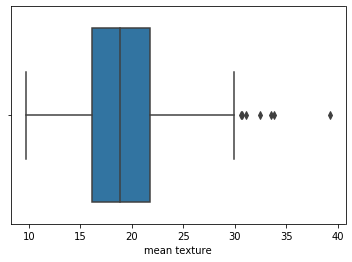

In [10]:
sns.boxplot(df['mean texture'], data = df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Cancer'],
      dtype='object')

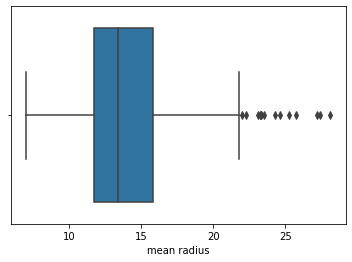

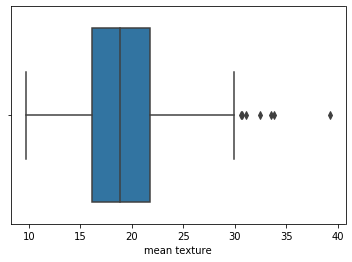

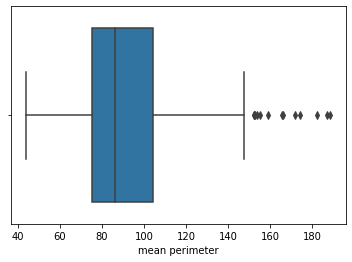

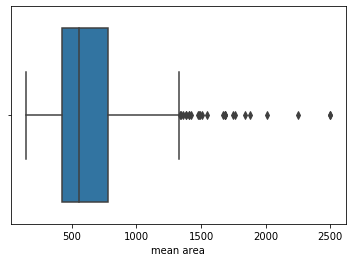

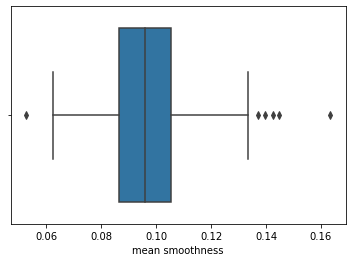

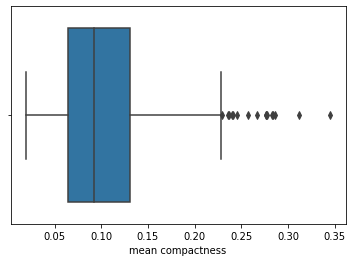

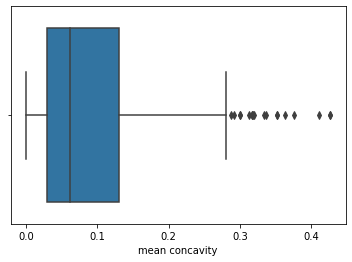

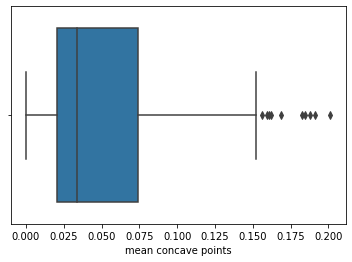

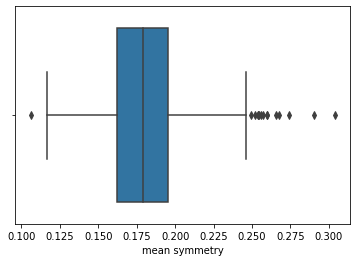

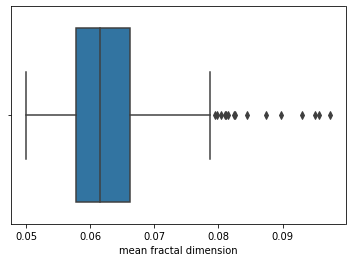

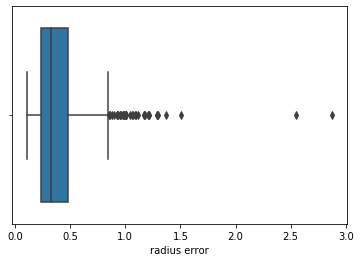

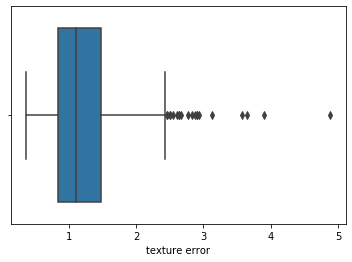

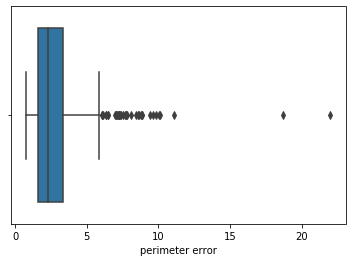

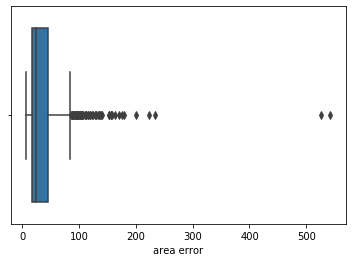

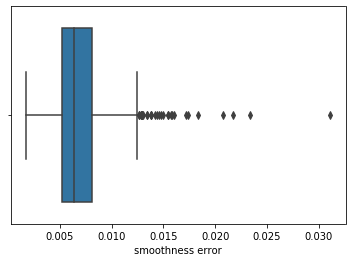

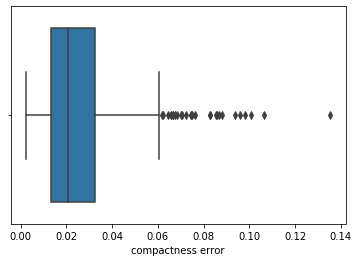

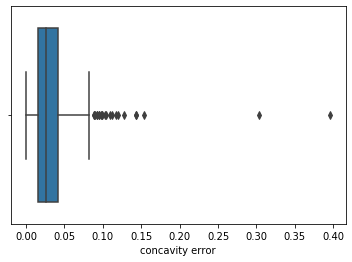

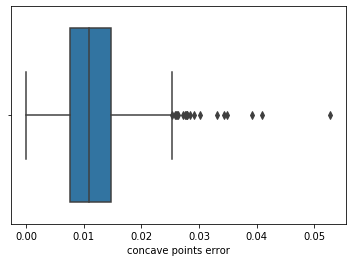

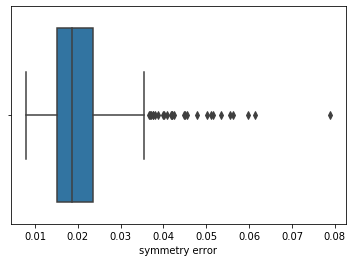

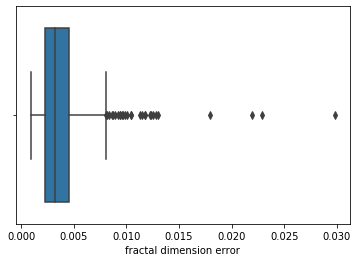

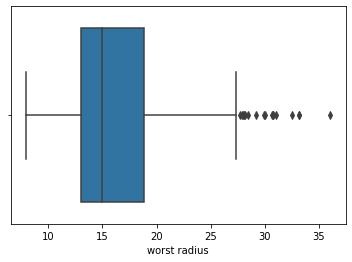

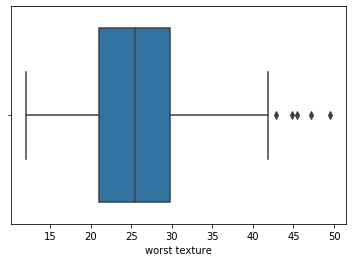

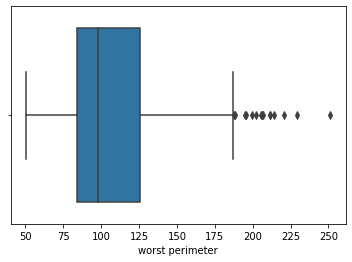

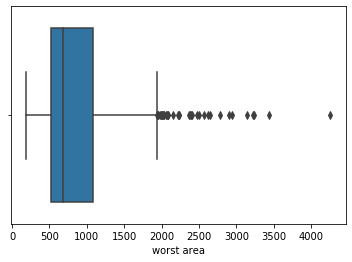

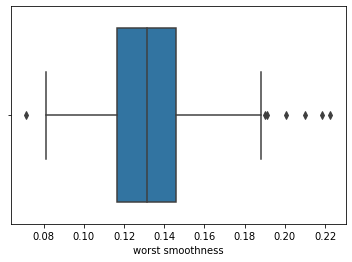

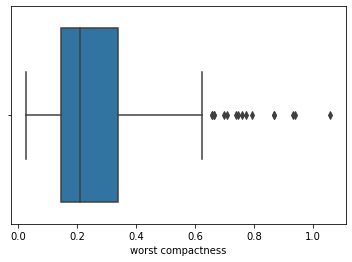

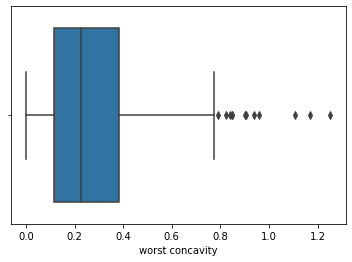

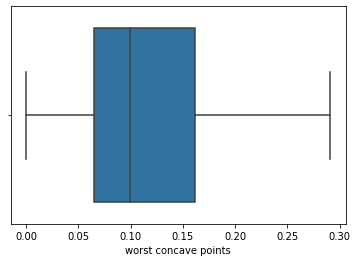

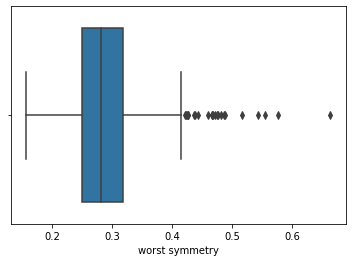

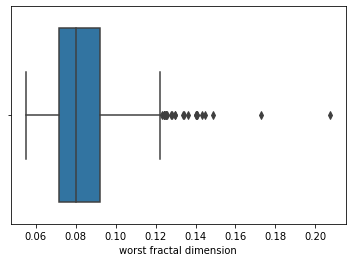

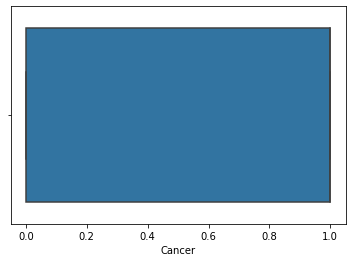

In [12]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [10]:
q1, q3= np.percentile(df['mean radius'],[25,75])
iqr = q3 - q1  #Inter Quartile Range
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
print('q1: ',q1, '\nq3: ',q3, '\niqr: ',iqr, '\nlower_fence: ',lower_fence, '\nupper_fence: ',upper_fence)

q1:  11.7 
q3:  15.78 
iqr:  4.08 
lower_fence:  5.579999999999999 
upper_fence:  21.9


In [16]:
df.iloc[:,:-1].columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [6]:
def outlier_treat(data):
    for i in data.columns: 
        if data[i].dtype == int or data[i].dtype == float:
            q1, q3 = np.percentile(data[i],[25,75]) 
            iqr = q3 - q1 
            lower = q1 - (1.5 * iqr) 
            upper = q3 + (1.5 * iqr) 
            data[i] = data[i].apply(lambda x : lower if x < lower 
                          else upper if x > upper else x)
    return data    

            
df2 = outlier_treat(df.iloc[:,:-1])
df2['Cancer'] = df['Cancer']

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


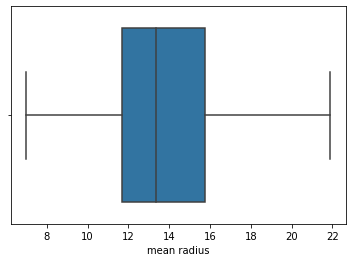

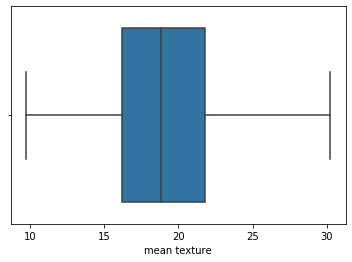

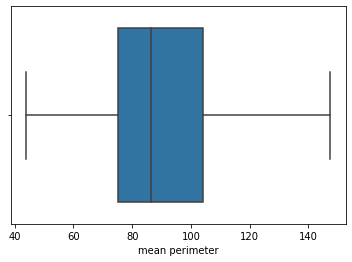

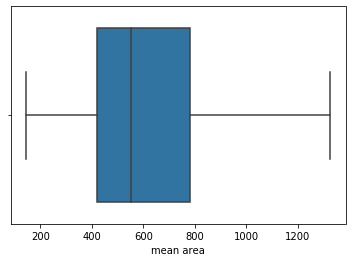

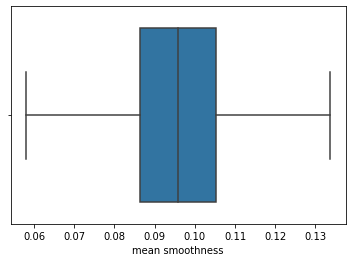

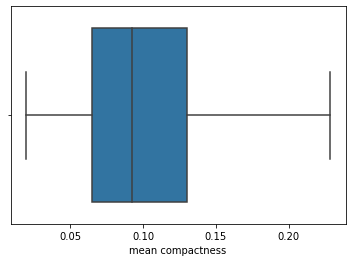

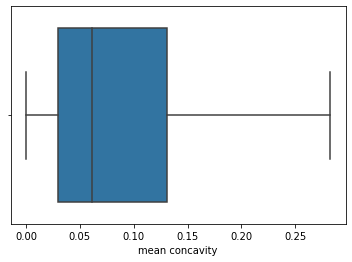

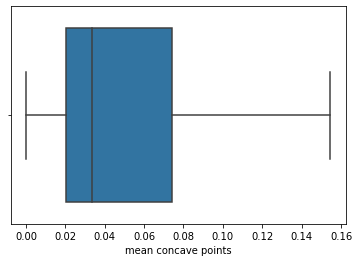

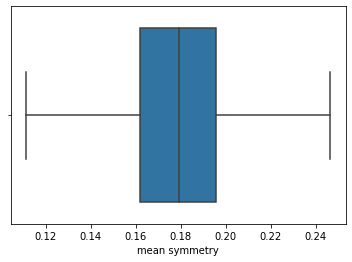

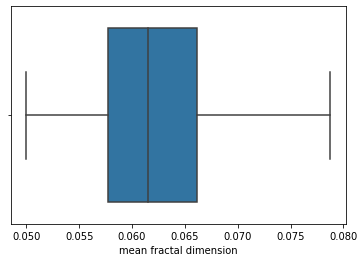

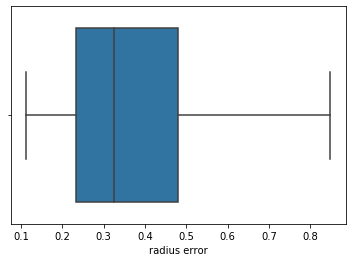

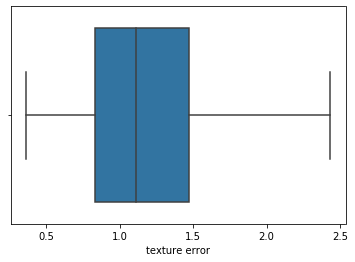

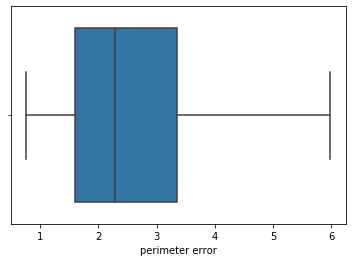

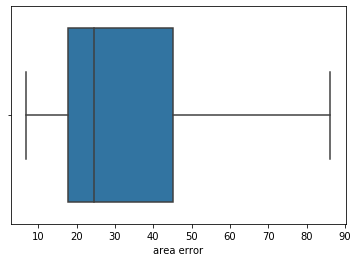

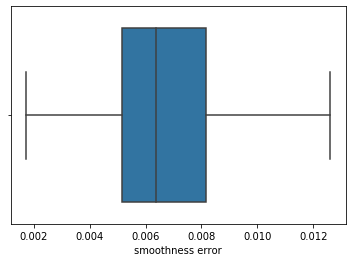

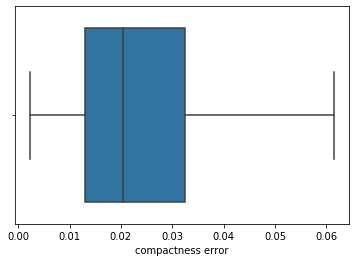

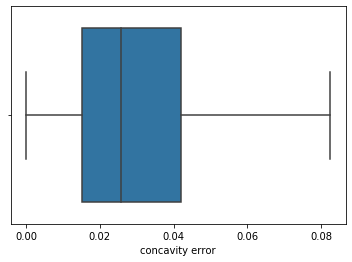

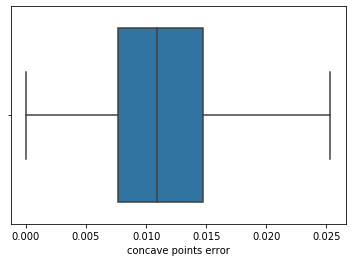

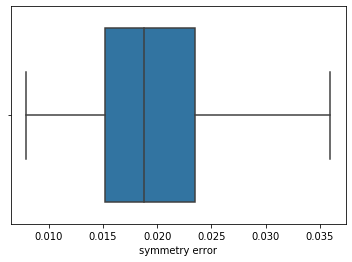

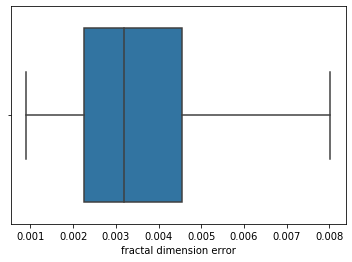

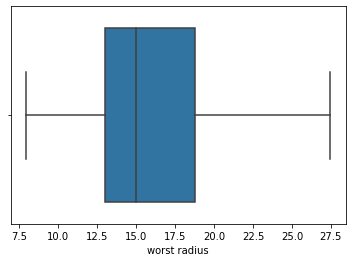

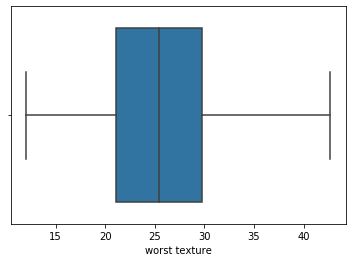

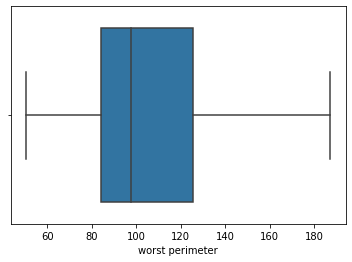

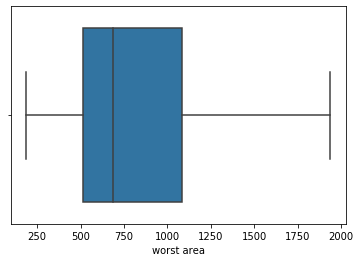

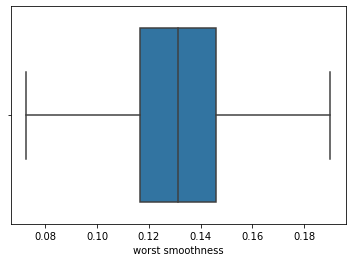

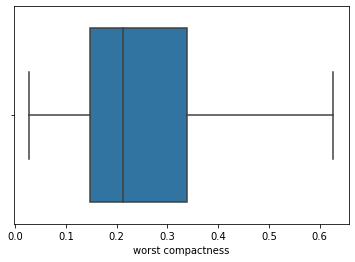

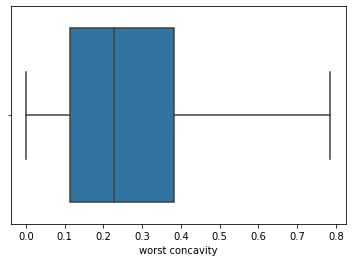

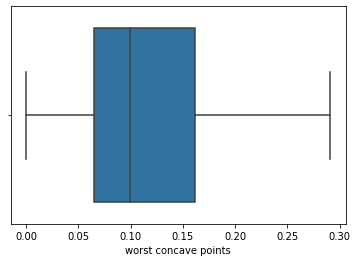

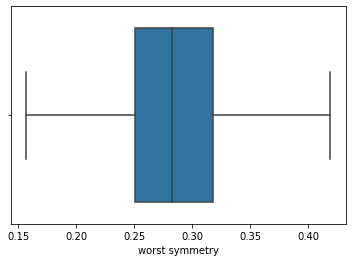

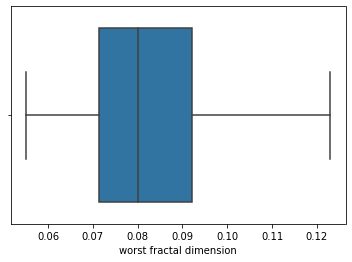

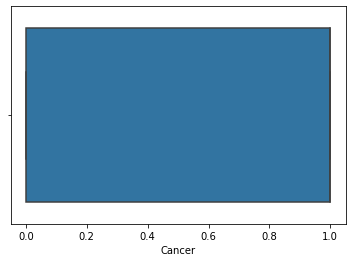

In [7]:
for i in df2.columns:
    sns.boxplot(df2[i], data = df2)
    plt.show()

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [15]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [10]:
# returns the names of the columns where condition satisfied
x = df2.corr().Cancer[(df2.corr().Cancer > 0.40) | (df2.corr().Cancer < -0.40)].index
x = x[:-1]
x

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concave points error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')

In [11]:
X = df2[x]

y = df2['Cancer']


In [71]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concave points error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=101)

In [21]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,Cancer
178,13.010,22.22,82.01,526.4,0.01938,0.001595,0.001852,0.1731,1.101,14.34,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,1
421,14.690,13.98,98.22,656.1,0.18360,0.145000,0.063000,0.5462,4.795,49.45,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.321900,0.110800,0.2827,1
57,14.710,21.59,95.55,656.9,0.13650,0.129300,0.081230,0.4226,2.735,40.09,...,17.87,30.70,115.70,985.5,0.13680,0.42900,0.358700,0.183400,0.3698,0
514,15.050,19.07,97.26,701.9,0.08597,0.074860,0.043350,0.3860,2.630,38.49,...,17.58,28.06,113.80,967.0,0.12460,0.21010,0.286600,0.112000,0.2282,0
548,9.683,19.34,61.05,285.7,0.05030,0.023370,0.009615,0.2957,2.054,18.24,...,10.93,25.59,69.10,364.2,0.11990,0.09546,0.093500,0.038460,0.2552,1


In [22]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,Cancer
107,12.36,18.54,79.01,466.7,0.06815,0.02643,0.01921,0.1199,0.8484,9.227,...,13.29,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,1
437,14.04,15.98,89.78,611.2,0.05895,0.03534,0.02944,0.3892,2.6440,32.740,...,15.66,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,1
195,12.91,16.33,82.53,516.4,0.05366,0.03873,0.02377,0.1942,1.4930,15.750,...,13.88,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,1
141,16.11,18.05,105.10,813.0,0.11370,0.09447,0.05943,0.7049,4.5330,74.080,...,19.92,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0
319,12.43,17.00,78.60,477.3,0.03454,0.01342,0.01699,0.3778,2.4870,31.160,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,1


## Standard Scaler - makes Unit variance and Zero Mean
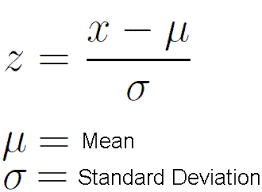

**u is the mean and s is the standard deviation**




## MinMax Scaler - Scales value from range 0-1


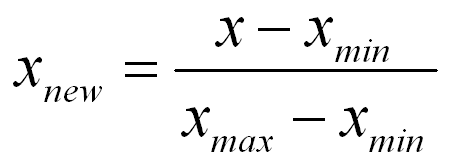


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
mc = MinMaxScaler()

X_train_mc = mc.fit_transform(X_train)

X_test_mc = mc.transform(X_test)

In [74]:
X_train_mc[0]

array([0.40411556, 0.6092038 , 0.36854539, 0.32372337, 0.        ,
       0.00564782, 0.01198434, 0.08356508, 0.06323747, 0.09005724,
       0.07314954, 0.31080389, 0.55446836, 0.27584444, 0.24180152,
       0.07440476, 0.01172331, 0.01015532, 0.03181787, 0.2776614 ])

In [75]:
np.mean(X_train_mc)
np.var(X_train_mc)

0.0609811065391527

In [76]:
X_train.iloc[0].index

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concave points error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')

# Train the Support Vector Classifier



In [14]:
from sklearn.svm import SVC

In [15]:
model = SVC()

In [16]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predictions and Evaluations

Now let's predict using the trained model.

In [17]:
predictions = model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [19]:
print(confusion_matrix(y_test,predictions))

[[ 56  10]
 [  3 102]]


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [67]:
display(y_test, predictions)

107    1
437    1
195    1
141    0
319    1
      ..
420    1
279    1
390    1
91     0
297    0
Name: Cancer, Length: 171, dtype: int32

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

We can search for parameters using a GridSearch!

# Gridsearch

This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation 

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [23]:
param_grid = {'C': [0.001, 1, 10, 100, 1000], 
              'gamma': [100, 0.1, 0.01, 0.001, 0.0001],
               'kernel': ['rbf']} 

In [22]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [24]:
grid = GridSearchCV(SVC(),
                    param_grid,
                    verbose=10,
                    cv = 10)

In [54]:
from sklearn.model_selection import LeaveOneOut

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [25]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.625, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.641, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.641, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.650, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.641, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.641, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] 

[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.675, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.700, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.675, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.675, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.675, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.718, total=   0.0s
[CV] C

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.923, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.846, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.923, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] ....... C=1000, gamma=100, kernel=rbf, score=0.650, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] ....... C=1000, gamma=100, kernel=rbf, score=0.650, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] ....... C=1000, gamma=100, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] ....... C=1000, gamma=100, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 1, 10, 100, 1000],
                         'gamma': [100, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [139]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [30]:
grid.best_score_


0.9523417721518987

Then you can re-run predictions on this grid object just like you would with a normal model.

In [31]:
grid_predictions = grid.predict(X_test)

In [145]:
print(confusion_matrix(y_test,grid_predictions))

[[ 61   5]
 [  3 102]]


In [152]:
print(classification_report(y_test,grid_predictions))
print(accuracy_score(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        66
           1       0.95      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

0.9532163742690059


In [153]:
grid_predictions_train = grid.predict(X_train)

print(classification_report(y_train, grid_predictions_train))

print(accuracy_score(y_train,grid_predictions_train))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.97      0.98      0.98       252

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398

0.9698492462311558
